# **Análise de Dados com Pandas**

O [*Pandas*](https://pandas.pydata.org/) é um pacote do Python criado em 2008. Seu nome significa *Panel Data Analysis* e pode ser considerado, atualmente, como o principal pacote para Análise Exploratória e transformação de dados.

A biblioteca está na sua versão 1.4.0 e vem crescendo a quantidade de funções a cada release. Neste notebook, vamos aprender algumas funções básicas para iniciar uma Análise Exploratória de Dados.

## Agenda
Desenvolveremos os seguintes passos durante a palestra:
* Importar a biblioteca
* Carregar um arquivo CSV (dataset neste [link do GitHub](https://github.com/gurezende/Studying/blob/master/Datasets/Cars.csv))
* Visualizar e entender os meta-dados do dataset
* Fatiar dataset
* Trabalhar com dados nulos
* Verificar estatísticas do dataset
* Agrupar dados
* Visualização

## Instalar e Carregar o Pandas

Por ser uma biblioteca muito utilizadas, ela já vem pré-instalada em programas conhecidos na área de Ciência de Dados, como o Anaconda e o Google Colab. Sendo assim, basta importar o pacote.

Entretanto, caso você veja erro dizendo que o módulo não existe, rode o comando de instalação a seguir.


```
# Para Formato Notebook
!pip install pandas

# Para IDE
pip install pandas
```



In [ ]:
# Carregar o Pandas para a sua sessão Python
import pandas as pd

## Carregar um arquivo CSV

In [ ]:
# Carregar o arquivo
endereco_arquivo = 'https://raw.githubusercontent.com/gurezende/Studying/master/Datasets/Cars.csv'
df = pd.read_csv(endereco_arquivo)

In [ ]:
# Visualizar o cabeçalho
df.head()

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
0,Acura,Integra,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
2,Acura,CL,Passenger,NaN,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,28892
3,Acura,RL,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,30956
4,Audi,A4,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,43338


In [ ]:
# Visualizar a cauda
df.tail()

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
151,Volvo,V40,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,40630
152,Volvo,S70,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,38695
153,Volvo,V70,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,38695
154,Volvo,C70,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,27545
155,Volvo,S80,Passenger,36.0,2.9,201,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,32342


#### Algumas opções de customização do read_csv()
Mais opções na [documentação](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

Leitura recomendada: [The Next Level of Pandas read_csv( )](https://medium.com/gustavorsantos/go-next-level-with-pandas-read-csv-29e3c207a66d)

In [ ]:
# Carregar apenas algumas colunas
pd.read_csv(endereco_arquivo, usecols=['Manufacturer', 'Engine_size', 'Price_in_thousands'] )

,Manufacturer,Price_in_thousands,Engine_size
0,Acura,21.50,1.8
1,Acura,28.40,3.2
2,Acura,NaN,3.2
3,Acura,42.00,3.5
4,Audi,23.99,1.8
...,...,...,...
151,Volvo,24.40,1.9
152,Volvo,27.50,2.4
153,Volvo,28.80,2.4
154,Volvo,45.50,2.3


In [ ]:
# Carregar apenas algumas linhas
pd.read_csv(endereco_arquivo, nrows=3 )

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
0,Acura,Integra,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,28892
2,Acura,CL,Passenger,NaN,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,NaN,28892


In [ ]:
# Ler algum dado como NA
pd.read_csv(endereco_arquivo, na_values= 'Passenger' )

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
0,Acura,Integra,NaN,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,NaN,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
2,Acura,CL,NaN,NaN,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,28892
3,Acura,RL,NaN,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,30956
4,Audi,A4,NaN,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,43338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,NaN,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,40630
152,Volvo,S70,NaN,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,38695
153,Volvo,V70,NaN,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,38695
154,Volvo,C70,NaN,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,27545


## Visualizar e entender os meta-dados do dataset

In [ ]:
# Verificando os número de linhas e colunas: interessante para saber se o dataset foi carregado corretamente
print('(linhas, ', 'cols)')
df.shape

(linhas,  cols)


(156, 15)

In [ ]:
# Entendendo as variáveis do dataset
df.columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor', 'mileage'],
      dtype='object')

In [ ]:
# Traduzindo os nomes
df.columns = ['fabricante', 'modelo', 'tipo_veiculo', 'preco', 'tam_motor', 'potencia_hp', 'entre_eixos', 'largura', 'comprimento', 'peso', 'cap_combustivel', 'eficiencia', 'ultima_versao', 'power_perf_factor', 'milhagem']

In [ ]:
# Verificando os tipos de dados: importante pois o Python trabalha com o conceito de objetos e cada tipo de objeto tem funções diferentes
df.dtypes

fabricante            object
modelo                object
tipo_veiculo          object
preco                float64
tam_motor            float64
potencia_hp            int64
entre_eixos          float64
largura              float64
comprimento          float64
peso                 float64
cap_combustivel      float64
eficiencia           float64
ultima_versao         object
power_perf_factor    float64
milhagem               int64
dtype: object

In [ ]:
# Caso precise mudar algum tipo de dado, use a função astype
df.astype({'comprimento':'object', 'peso': 'object'})

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
0,Acura,Integra,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
2,Acura,CL,Passenger,NaN,3.2,225,106.9,70.6,192,3.47,17.2,26.0,1/4/2012,NaN,28892
3,Acura,RL,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.85,18.0,22.0,3/10/2011,91.389779,30956
4,Audi,A4,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27.0,10/8/2011,62.777639,43338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,Passenger,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,40630
152,Volvo,S70,Passenger,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,38695
153,Volvo,V70,Passenger,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,38695
154,Volvo,C70,Passenger,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,27545


In [ ]:
# Verificando os tipos de dados: Um modo compacto que traz as informações de shape, colunas e tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fabricante         156 non-null    object 
 1   modelo             156 non-null    object 
 2   tipo_veiculo       156 non-null    object 
 3   preco              155 non-null    float64
 4   tam_motor          156 non-null    float64
 5   potencia_hp        156 non-null    int64  
 6   entre_eixos        156 non-null    float64
 7   largura            156 non-null    float64
 8   comprimento        156 non-null    float64
 9   peso               155 non-null    float64
 10  cap_combustivel    156 non-null    float64
 11  eficiencia         154 non-null    float64
 12  ultima_versao      156 non-null    object 
 13  power_perf_factor  155 non-null    float64
 14  milhagem           156 non-null    int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 18.4+ KB


## Fatiar Dataset

Um dataset pode ser fatiado com anotação específica de fatiamento **[ ]** e os números de indexação. Lembre-se sempre que indexação em Python começa por zero.

In [ ]:
# Fatiando as 3 primeiras linhas. Número da direita é exclusivo.
# Outra forma de ler: "Pandas, quero 3 linhas a partir do índice 0."
df[0:3]

,fabricante,modelo,veículo,preco,tam_motor,potencia,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
0,Acura,Integra,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
2,Acura,CL,Passenger,NaN,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,28892


In [ ]:
# Fatiando colunas: use os nomes
minhas_colunas = ['fabricante', 'preco', 'potencia_hp']
df[minhas_colunas].head(3)

,fabricante,preco,potencia_hp
0,Acura,21.5,140
1,Acura,28.4,225
2,Acura,NaN,225


In [ ]:
# Utilizando o localizador .loc
# Os números são inclusivos, pois são os "nomes dos índices"
# Leitura: "Pandas, localize para mim os índices 10 ao 12 e as colunas listadas"
df.loc[10:12, ['fabricante',	'modelo',	'tipo_veiculo']]

,fabricante,modelo,tipo_veiculo
10,Buick,Century,Passenger
11,Buick,Regal,Passenger
12,Buick,Park Avenue,Passenger


In [ ]:
# Utilizando o localizador .iloc
# Os números são exclusivos, pois são os "valores dos índices"
# Leitura: "Pandas, localize para mim os índices 10 ao 12 e as 3 primeiras colunas"
df.iloc[10:13, 0:3].head(3)

,fabricante,modelo,tipo_veiculo
10,Buick,Century,Passenger
11,Buick,Regal,Passenger
12,Buick,Park Avenue,Passenger


Um dataset também pode ser *filtrado ou fatiado* usando o conceito de variáveis booleanas, isto é, verdadeiro e falso.

In [ ]:
# Uma comparação retorna verdadeiro ou falso para cada linha no Pandas
df.preco > 20

0       True
1       True
2      False
3       True
4       True
       ...  
151     True
152     True
153     True
154     True
155     True
Name: preco, Length: 156, dtype: bool

In [ ]:
# Fatiando carros com preço maior do que 20
condicao = df.preco > 20
df[condicao]

# Outra forma
df[ df.preco > 20 ]

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
0,Acura,Integra,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
3,Acura,RL,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,30956
4,Audi,A4,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,43338
5,Audi,A6,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,32504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,Passenger,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,40630
152,Volvo,S70,Passenger,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,38695
153,Volvo,V70,Passenger,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,38695
154,Volvo,C70,Passenger,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,27545


In [ ]:
# Exemplo de comparação para todas as colunas numéricas do dataset
df.select_dtypes('number') > 10

### Usando o Pandas Query
O Pandas Query oferece uma anotação simples e amigável


```
df.query( 'nome_coluna + condição') 
```
Leitura recomendada: [Pandas Query: the easiest way to filter data](https://medium.com/gustavorsantos/pandas-query-the-easiest-way-to-filter-data-39e0163ef35a)


In [ ]:
# Filtrando preço maior ou igual a 40
df.query('preco >= 40').head(3)

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
3,Acura,RL,Passenger,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,30956
6,Audi,A8,Passenger,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858,20970
15,Cadillac,Seville,Passenger,44.475,4.6,275,112.2,75.0,201.0,NaN,18.5,22.0,4/29/2011,115.621358,23639


In [ ]:
# Filtrando fabricantes que estejam numa lista
df.query('fabricante in ["Audi", "Mercedes-Benz", "BMW"]')

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
4,Audi,A4,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,43338
5,Audi,A6,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,32504
6,Audi,A8,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858,20970
7,BMW,323i,Passenger,26.99,2.5,170,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207,38240
8,BMW,328i,Passenger,33.40,2.8,193,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069,33682
9,BMW,528i,Passenger,38.90,2.8,193,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724,33682


In [ ]:
# Filtrando fabricantes com nomes que contenham Mercedes
df.query('fabricante.str.contains("Mercedes")', engine='python').head(3)

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
91,Mercedes-B,C-Class,Passenger,31.75,2.3,185,105.9,67.7,177.4,3.250,16.4,26.0,4/24/2011,78.280731,35139
92,Mercedes-B,E-Class,Passenger,49.90,3.2,221,111.5,70.8,189.4,3.823,21.1,25.0,7/12/2011,98.249737,29415
93,Mercedes-B,S-Class,Passenger,69.70,4.3,275,121.5,73.1,203.1,4.133,23.2,21.0,6/13/2011,125.273876,23639


## Trabalhar com dados nulos

Lembre-se que, para que os comandos façam efeito, é preciso designar a mudança a uma variável, podendo ser uma nova ou a mesma.
Procure manter os dados originais em uma variável separada e usar novos nomes quando houver mudanças significativas.

Exemplo:
df2 = df.dropna()

In [ ]:
# Verificando a presença de dados nulos ou NA
#df.isnull().sum()

# Outra forma. Mesmo comando, mas transforma o output em um dataframe e faz a transposição de linhas para colunas
df.isnull().sum().to_frame().T

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
0,0,0,0,1,0,0,0,0,0,1,0,2,0,1,0


In [ ]:
# Vamos verificar se os NAs estão na mesma observação ou em diferentes
df[ df.preco.isnull() ]


,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
2,Acura,CL,Passenger,NaN,3.2,225,106.9,70.6,192.0,3.47,17.2,26.0,1/4/2012,NaN,28892


In [ ]:
# Dá pra ver todos de uma vez
df[ (df.preco.isnull()) |  (df.peso.isnull()) | (df.eficiencia.isnull()) | (df.power_perf_factor.isnull())]

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
2,Acura,CL,Passenger,NaN,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,28892
15,Cadillac,Seville,Passenger,44.475,4.6,275,112.2,75.0,201.0,NaN,18.5,22.0,4/29/2011,115.621358,23639
37,Dodge,Intrepid,Passenger,22.505,2.7,202,113.0,74.7,203.7,3.489,17.0,NaN,6/2/2012,80.831470,32182
108,Oldsmobile,Intrigue,Passenger,24.150,3.5,215,109.0,73.6,195.9,3.455,18.0,NaN,4/1/2011,86.272523,30236


In [ ]:
# Inserir um valor constante para os NAs
df.fillna(0).head()

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
0,Acura,Integra,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
2,Acura,CL,Passenger,0.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,0.000000,28892
3,Acura,RL,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,30956
4,Audi,A4,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,43338


In [ ]:
# Inserir média no lugar dos NAs
df.fillna( df.mean() )

# Inserir mediana
df.fillna( df.median() ) 

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
0,Acura,Integra,Passenger,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
2,Acura,CL,Passenger,22.799,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,72.030917,28892
3,Acura,RL,Passenger,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,30956
4,Audi,A4,Passenger,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,43338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,Passenger,24.400,1.9,160,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,40630
152,Volvo,S70,Passenger,27.500,2.4,168,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,38695
153,Volvo,V70,Passenger,28.800,2.4,168,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,38695
154,Volvo,C70,Passenger,45.500,2.3,236,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,27545


In [ ]:
# Interpolação: Linear
df.fillna(df.interpolate()).head(4)

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,mileage
0,Acura,Integra,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,46434
1,Acura,TL,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28892
2,Acura,CL,Passenger,35.2,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.380278,28892
3,Acura,RL,Passenger,42.0,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,30956


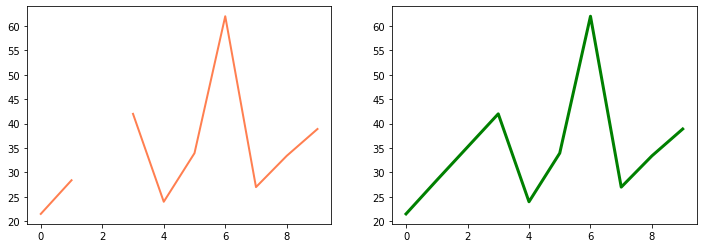

In [ ]:
import matplotlib.pyplot as plt
fig, grid = plt.subplots(1,2, figsize=(12,4))
# Ilustrando a interpolação
df.preco[:10].plot(color='coral', linewidth=2, ax=grid[0])
df.fillna(df.interpolate(method='linear')).preco[:10].plot(color='green',  linewidth=3, ax=grid[1]);

In [ ]:
# Mais fácil: excluir NAs
# Regra geral - excluir entre 3% e 5% dos dados está ok. 4 observações = 2,5% dos dados

# Salva na mesma variável
#df.dropna(inplace=True)

# Salva em uma nova variável
df_limpo = df.dropna()

## Verificar estatísticas do dataset

Verificar as estatísticas do seu Dataset é muito importante, pois ele te traz muitos insights com poucos comandos.

In [ ]:
# Estatísticas descritivas de dados numéricos
df_limpo.describe().round(1)

,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,power_perf_factor,milhagem
count,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,27.8,3.1,189.9,113.1,71.1,187.1,3.4,18.0,23.8,76.7,38553.7
std,15.6,1.2,87.1,72.8,3.5,13.5,0.6,3.9,4.3,25.2,12626.6
min,9.2,1.0,55.0,92.6,62.6,149.4,1.9,10.3,15.0,23.3,14446.0
25%,17.9,2.3,147.5,102.9,68.4,177.5,3.0,15.8,21.0,59.8,30776.0
50%,22.7,3.0,175.0,107.0,70.4,186.6,3.3,17.2,24.0,71.5,37147.0
75%,32.3,3.6,211.2,112.2,73.1,195.1,3.8,19.8,26.0,89.4,44074.5
max,100.0,9.9,999.0,999.9,79.9,224.5,5.6,32.0,45.0,188.1,118196.0


Das estatísticas descritivas acima, veja quanta informação podemos tirar:
* Os carros neste dataset custam - em média - $27 mil.
* Os dados de preços estão bem dispersos, sendo que o desvio padrão é 50% do valor da média.
* Os dados de eficiência de combustível estão mais próximos. Média é cerca de 24 e o coeficiente de variação (std/mean) é 18%.
* Aparentemente, vemos outliers em todas as colunas, já que o valor máximo é bem afastado da média.
* Existe uma observação suspeita com valores 9999.

In [ ]:
# Estatísticas das variávels categóricas
df_limpo.describe(include='object')

,fabricante,modelo,tipo_veiculo,ultima_versao
count,152,152,152,152
unique,30,151,2,127
top,Ford,Neon,Passenger,2/10/2011
freq,11,2,112,2


In [ ]:
# Encontrar dado outlier sem sentido
df_limpo.query('potencia_hp > 900')

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
55,Ford,F-Series,Car,99.999,9.9,999,999.9,79.1,224.5,4.241,25.1,18.0,8/16/2012,89.401935,29549


In [ ]:
# Remover dado sem sentido
df_limpo.drop([55], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Agrupar dados

Agrupar dados é fundamental para uma boa exploração de dados. Ao invés de olharmos para 10 linhas de um mesmo grupo, por que não olharmos para apenas uma linha de cada grupo com os dados sumarizados?
Essa é a ideia por trás dos agrupamentos.
Leitura recomendada: [8 coisas que você não sabia sobre o Pandas groupby](https://medium.com/data-hackers/8-coisas-que-voc%C3%AA-n%C3%A3o-sabia-sobre-o-pandas-groupby-b2c9033d7034)

Agrupa com o Pandas é bem simples. Use a seguinte sintaxe:


```
df.groupby('coluna para agrupamento')['coluna a ser sumarizada'].funçao()
```



#### Quais são as marcas com melhores preços médios?

In [ ]:
# Vamos agrupar os dados por média de preço por fabricante
# dataset  .  agrupar_por()    ['coluna a sumarisar']. função()
df_limpo.groupby('fabricante')['preco'].mean().sort_values()

fabricante
Hyundai       12.165667
Saturn        14.271000
Volkswagen    17.698333
Chevrolet     20.022778
Honda         20.277000
Ford          20.458500
Mercury       20.748333
Jeep          20.991667
Subaru        21.395000
Toyota        21.982889
Mitsubishi    22.167429
Nissan        22.360714
Plymouth      22.642500
Pontiac       22.949167
Chrysler      23.430833
Dodge         24.384500
Oldsmobile    25.917400
Buick         26.781250
Infiniti      29.465000
Saab          29.610000
Acura         30.633333
Volvo         30.933333
BMW           33.096667
Cadillac      39.198750
Audi          39.980000
Lincoln       41.690000
Jaguar        42.800000
Lexus         44.055000
Mercedes-B    52.916667
Porsche       62.473333
Name: preco, dtype: float64

#### Quais são as marcas com melhores valores de consumo de combustível?


In [ ]:
# Agrupar por fabricante e retorna média de eficiência de combustível
df.groupby('fabricante').eficiencia.mean().sort_values()

fabricante
Jeep          18.666667
Lincoln       19.333333
Dodge         20.100000
Cadillac      20.600000
Lexus         20.833333
Jaguar        21.000000
Porsche       22.000000
Nissan        22.285714
Ford          22.818182
Mitsubishi    22.857143
Oldsmobile    23.000000
Saab          23.000000
Audi          23.333333
Mercedes-B    23.444444
Mercury       23.666667
Buick         24.250000
Subaru        24.500000
Volvo         24.500000
Chrysler      24.500000
Pontiac       24.833333
Infiniti      25.000000
Honda         25.000000
BMW           25.000000
Toyota        25.222222
Plymouth      25.250000
Acura         25.250000
Volkswagen    26.166667
Hyundai       27.666667
Chevrolet     28.444444
Saturn        30.400000
Name: eficiencia, dtype: float64

#### Resumo dos fabricantes

In [ ]:
# Mais de um tipo de sumarização no mesmo comando
df.groupby('fabricante').agg({'preco':['mean', 'min'],
                              'potencia_hp':'mean',
                              'eficiencia': 'mean',
                              'milhagem':'mean' }).sort_values(by=('preco', 'mean'))

preco         potencia_hp eficiencia      milhagem
                 mean     min        mean       mean          mean
fabricante                                                        
Hyundai     12.165667   9.699  126.666667  27.666667  53672.666667
Saturn      14.271000  10.685  119.600000  30.400000  55468.600000
Volkswagen  17.698333  14.900  120.833333  26.166667  54329.666667
Chevrolet   20.022778   9.235  171.111111  28.444444  47540.000000
Honda       20.277000  12.885  160.400000  25.000000  43335.000000
Mercury     20.748333  16.240  163.833333  23.666667  41366.666667
Jeep        20.991667  14.460  168.333333  18.666667  40574.666667
Subaru      21.395000  20.095  165.000000  24.500000  39398.000000
Toyota      21.982889  11.528  160.666667  25.222222  42502.111111
Mitsubishi  22.167429  13.987  165.142857  22.857143  40855.285714
Nissan      22.360714  13.499  169.000000  22.285714  39396.428571
Plymouth    22.642500  12.640  166.750000  25.250000  41882.000000
Pontiac     22.949167  19.720  185.000000  24.833333  35529.333333
Chrysler    23.430833  16.480  194.833333  24.500000  35286.166667
Dodge       24.213636  12.640  199.545455  20.100000  36616.909091
Oldsmobile  25.622833  18.145  190.000000  23.000000  35378.000000
Buick       26.781250  21.975  206.250000  24.250000  31913.750000
Ford        27.689455  12.050  240.909091  22.818182  41118.909091
Infiniti    29.465000  29.465  227.000000  25.000000  28637.000000
Saab        29.610000  26.100  177.500000  23.000000  36689.500000
Acura       30.633333  21.500  200.000000  25.250000  33793.500000
Volvo       30.933333  23.400  182.166667  24.500000  36422.833333
BMW         33.096667  26.990  185.333333  25.000000  35201.333333
Audi        39.980000  23.990  220.000000  23.333333  32270.666667
Cadillac    40.254000  31.010  256.000000  20.600000  25782.800000
Lincoln     41.690000  39.080  263.333333  19.333333  25181.333333
Jaguar      42.800000  42.800  240.000000  21.000000  27086.000000
Lexus       44.055000  31.505  245.833333  20.833333  26957.666667
Mercedes-B  52.916667  31.750  232.222222  23.444444  29007.555556
Porsche     62.473333  41.430  272.333333  22.000000  24431.666667

## Visualização

Agora suponha que queremos escolher um carro desse dataset para comprar.

Nossas condições:
* Valor: até $25 mil
* Motor: mais potente possível
* Eficiência de combustível: maior possível
* Tamanho: Não pode passar de 190.

Vamos agrupar os dados para conseguirmos as respostas.


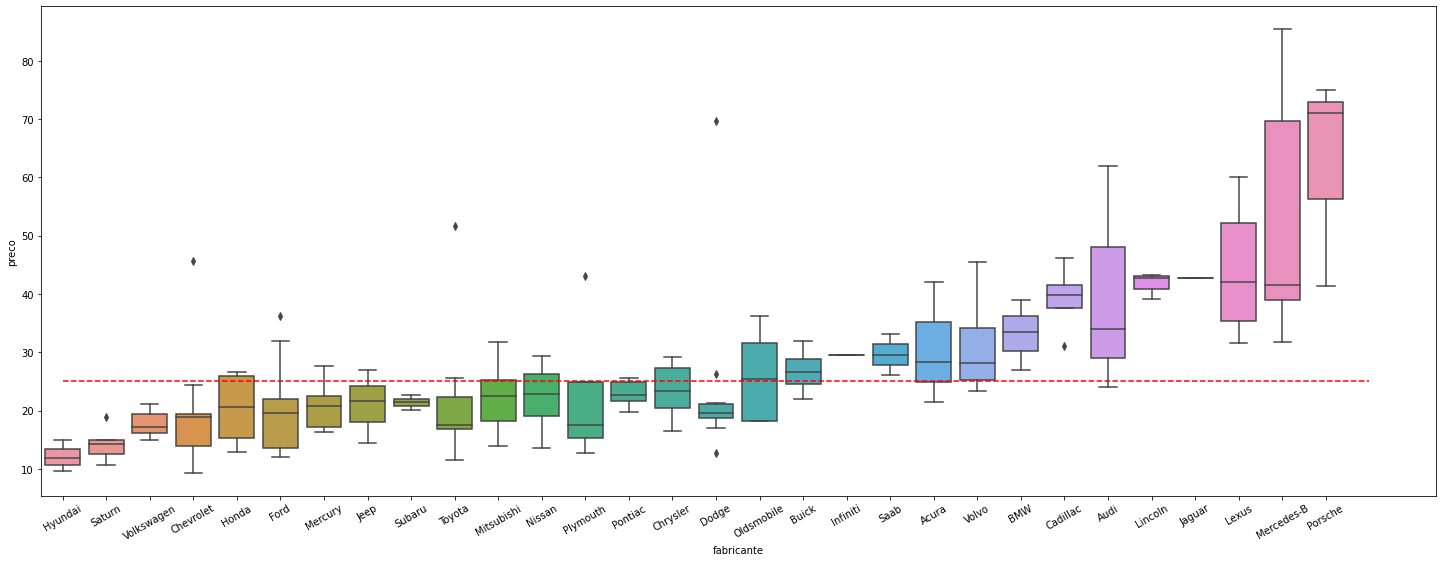

In [ ]:
# Vamos importar o seaborn para nos ajudar na primeira tarefa
import seaborn as sns

# Configurando a figura de plotagem
plt.figure(figsize=(25,9))

# Criar uma ordem de plotagem para o eixo X, do preço médio mais baixo para o mais alto
# Para isso, agruparemos os preços médios por fabricante, ordenamos e coletamos os índices
ordem = df_limpo.groupby('fabricante').preco.mean().sort_values().index

# Queremos ver os boxplots dos preços
g1 = sns.boxplot(data=df_limpo, x='fabricante', y='preco', order=ordem)

# Configurar os nomes no eixo X
plt.xticks(rotation = 30)

# Podemos ainda colocar uma linha na faixa de $25 mil
plt.hlines(y=25, xmin=0, xmax=len(ordem), linestyles='--', color='red');

In [ ]:
# Filtrando nossos carros abaixo de $25 mil e menores do que 190 de comprimento
df_filtro = df_limpo.query('preco <= 25 & comprimento <= 190').sort_values(by=['preco', 'potencia_hp', 'eficiencia'])
df_filtro.head(10)

,fabricante,modelo,tipo_veiculo,preco,tam_motor,potencia_hp,entre_eixos,largura,comprimento,peso,cap_combustivel,eficiencia,ultima_versao,power_perf_factor,milhagem
26,Chevrolet,Metro,Passenger,9.235,1.0,55,93.1,62.6,149.4,1.895,10.3,45.0,4/13/2012,23.276272,118196
61,Hyundai,Accent,Passenger,9.699,1.5,92,96.1,65.7,166.7,2.240,11.9,31.0,9/10/2012,36.672284,70660
128,Saturn,SL,Passenger,10.685,1.9,100,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425,65008
139,Toyota,Tacoma,Car,11.528,2.4,142,103.3,66.5,178.7,2.580,15.1,23.0,8/1/2011,55.297117,45780
62,Hyundai,Elantra,Passenger,11.799,2.0,140,100.4,66.9,174.0,2.626,14.5,27.0,11/15/2011,54.590045,46434
45,Ford,Escort,Passenger,12.070,2.0,110,98.4,67.0,174.7,2.468,12.7,30.0,3/31/2012,44.083709,59098
49,Ford,Focus,Passenger,12.315,2.0,107,103.0,66.9,174.8,2.564,13.2,30.0,7/22/2012,43.117132,60755
129,Saturn,SC,Passenger,12.535,1.9,100,102.4,66.4,180.0,2.367,12.1,33.0,3/16/2011,40.700072,65008
34,Dodge,Neon,Passenger,12.640,2.0,132,105.0,74.4,174.4,2.567,12.5,29.0,12/12/2011,52.084899,49248
113,Plymouth,Neon,Passenger,12.640,2.0,132,105.0,74.4,174.4,2.559,12.5,29.0,4/26/2011,52.084899,49248


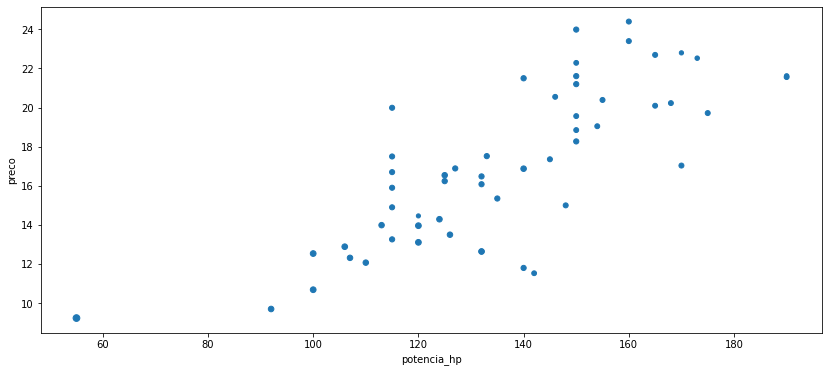

In [ ]:
# Plotando nossos carros
df_filtro.plot.scatter(x= 'potencia_hp',
                y= 'preco',
                s='eficiencia',
                figsize=(14,6));

In [ ]:
# importar plotly express para interagir com o gráfico
import plotly.express as px

fig = px.scatter(df_filtro,
                 x='potencia_hp',
                 y='preco',
                 size='eficiencia',
                 color='eficiencia',
                 hover_data= ['fabricante', 'modelo'],)
fig.show()

## FIM DO NOTEBOOK